In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, ParameterSampler, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from scipy.stats import uniform
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [89]:
df = pd.read_csv("/Users/ardrianwong/Desktop/Columbia/Fall2022/coms4995AppliedML/AML_Project/diabetes_binary_health_indicators_BRFSS2015.csv")

In [90]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [91]:
non_dup_df = df.drop_duplicates()
y = non_dup_df['Diabetes_binary']
X = non_dup_df.drop('Diabetes_binary', axis=1)

In [92]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Standardize the columns in the feature matrices
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)   # Fit and transform scalar on X_train
X_test = scaler.transform(X_test)         # Transform X_test
print(len(X_dev), len(X_test), str(len(X_dev) + len(X_test)))
sm = SMOTE(random_state=0)
X_dev_sm, y_dev_sm = sm.fit_resample(X_dev, y_dev)
print(len(X_dev_sm))

183579 45895 229474
311006


In [93]:
#SVM with SMOTE
SVM = LinearSVC(max_iter=1000, dual=False, random_state=0)
distributions = dict(C=uniform(loc=0, scale=10))
clf = RandomizedSearchCV(SVM, distributions, cv=5,
                         scoring =['recall', 'f1', 'precision', 'accuracy'],
                         refit='recall',
                         n_iter=100,
                         verbose=3,
                         random_state=0)
search1 = clf.fit(X_dev_sm, y_dev_sm)
search1.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=5.4881350392732475; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.7s
[CV 2/5] END C=5.4881350392732475; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.7s
[CV 3/5] END C=5.4881350392732475; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.7s
[CV 4/5] END C=5.4881350392732475; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.7s
[CV 5/5] END C=5.4881350392732475; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=7.151893663724195; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=7.151893663724195; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall

[CV 5/5] END C=5.288949197529044; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=5.680445610939323; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=5.680445610939323; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.7s
[CV 3/5] END C=5.680445610939323; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.7s
[CV 4/5] END C=5.680445610939323; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.7s
[CV 5/5] END C=5.680445610939323; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=9.25596638292661; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=9.25596638292661; ac

[CV 5/5] END C=7.805291762864554; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=1.1827442586893322; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=1.1827442586893322; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.6s
[CV 3/5] END C=1.1827442586893322; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.6s
[CV 4/5] END C=1.1827442586893322; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.7s
[CV 5/5] END C=1.1827442586893322; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=6.399210213275238; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=6.399210213275

[CV 5/5] END C=6.176354970758771; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=6.120957227224214; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=6.120957227224214; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.6s
[CV 3/5] END C=6.120957227224214; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.6s
[CV 4/5] END C=6.120957227224214; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.7s
[CV 5/5] END C=6.120957227224214; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=6.169339968747569; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=6.169339968747569; 

[CV 5/5] END C=1.289262976548533; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=3.1542835092418384; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=3.1542835092418384; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.7s
[CV 3/5] END C=3.1542835092418384; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.6s
[CV 4/5] END C=3.1542835092418384; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.6s
[CV 5/5] END C=3.1542835092418384; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=3.637107709426226; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=3.637107709426

[CV 5/5] END C=2.4442559200160274; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=1.5896958364551972; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=1.5896958364551972; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.6s
[CV 3/5] END C=1.5896958364551972; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.6s
[CV 4/5] END C=1.5896958364551972; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.6s
[CV 5/5] END C=1.5896958364551972; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=1.1037514116430513; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=1.1037514116

[CV 5/5] END C=4.686512016477016; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=9.767610881903371; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=9.767610881903371; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.7s
[CV 3/5] END C=9.767610881903371; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.7s
[CV 4/5] END C=9.767610881903371; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.6s
[CV 5/5] END C=9.767610881903371; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.7s
[CV 1/5] END C=6.04845519745046; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=6.04845519745046; ac

[CV 5/5] END C=6.924721193700199; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=5.666014542065751; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=5.666014542065751; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.6s
[CV 3/5] END C=5.666014542065751; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.6s
[CV 4/5] END C=5.666014542065751; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.6s
[CV 5/5] END C=5.666014542065751; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=2.653894909394454; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=2.653894909394454; 

[CV 5/5] END C=1.8319136200711683; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=5.865129348100831; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=5.865129348100831; accuracy: (test=0.738) f1: (test=0.747) precision: (test=0.722) recall: (test=0.773) total time=   0.7s
[CV 3/5] END C=5.865129348100831; accuracy: (test=0.740) f1: (test=0.748) precision: (test=0.726) recall: (test=0.772) total time=   0.7s
[CV 4/5] END C=5.865129348100831; accuracy: (test=0.739) f1: (test=0.749) precision: (test=0.722) recall: (test=0.779) total time=   0.7s
[CV 5/5] END C=5.865129348100831; accuracy: (test=0.742) f1: (test=0.750) precision: (test=0.728) recall: (test=0.773) total time=   0.6s
[CV 1/5] END C=0.20107546187493552; accuracy: (test=0.734) f1: (test=0.740) precision: (test=0.723) recall: (test=0.758) total time=   0.6s
[CV 2/5] END C=0.20107546187493

{'C': 0.046954761925470656}

In [94]:
print(classification_report(y_test, search1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     38874
         1.0       0.32      0.77      0.45      7021

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895



In [95]:
#SVM without SMOTE
SVM2 = LinearSVC(max_iter=1000, dual=False, random_state=0)
distributions2 = dict(C=uniform(loc=0, scale=10))
clf2 = RandomizedSearchCV(SVM2, distributions, cv=5,
                         scoring =['recall', 'f1', 'precision', 'accuracy'],
                         refit='recall',
                         n_iter=100,
                         verbose=3,
                         random_state=0)
search2 = clf2.fit(X_dev, y_dev)
search2.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=5.4881350392732475; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.5s
[CV 2/5] END C=5.4881350392732475; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=5.4881350392732475; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.5s
[CV 4/5] END C=5.4881350392732475; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=5.4881350392732475; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=7.151893663724195; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.5s
[CV 2/5] END C=7.151893663724195; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall

[CV 5/5] END C=5.288949197529044; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=5.680445610939323; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=5.680445610939323; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=5.680445610939323; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=5.680445610939323; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=5.680445610939323; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=9.25596638292661; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=9.25596638292661; ac

[CV 5/5] END C=7.805291762864554; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=1.1827442586893322; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=1.1827442586893322; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=1.1827442586893322; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=1.1827442586893322; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.5s
[CV 5/5] END C=1.1827442586893322; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=6.399210213275238; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=6.399210213275

[CV 5/5] END C=6.176354970758771; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=6.120957227224214; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=6.120957227224214; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=6.120957227224214; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=6.120957227224214; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=6.120957227224214; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=6.169339968747569; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.5s
[CV 2/5] END C=6.169339968747569; 

[CV 5/5] END C=1.289262976548533; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=3.1542835092418384; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=3.1542835092418384; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=3.1542835092418384; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=3.1542835092418384; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=3.1542835092418384; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=3.637107709426226; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=3.637107709426

[CV 5/5] END C=2.4442559200160274; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=1.5896958364551972; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=1.5896958364551972; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=1.5896958364551972; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=1.5896958364551972; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=1.5896958364551972; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=1.1037514116430513; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=1.1037514116

[CV 5/5] END C=4.686512016477016; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=9.767610881903371; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=9.767610881903371; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=9.767610881903371; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=9.767610881903371; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=9.767610881903371; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=6.04845519745046; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=6.04845519745046; ac

[CV 5/5] END C=6.924721193700199; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=5.666014542065751; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=5.666014542065751; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=5.666014542065751; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=5.666014542065751; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=5.666014542065751; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=2.653894909394454; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=2.653894909394454; 

[CV 5/5] END C=1.8319136200711683; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=5.865129348100831; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=5.865129348100831; accuracy: (test=0.850) f1: (test=0.117) precision: (test=0.571) recall: (test=0.065) total time=   0.4s
[CV 3/5] END C=5.865129348100831; accuracy: (test=0.850) f1: (test=0.114) precision: (test=0.594) recall: (test=0.063) total time=   0.4s
[CV 4/5] END C=5.865129348100831; accuracy: (test=0.850) f1: (test=0.121) precision: (test=0.580) recall: (test=0.068) total time=   0.4s
[CV 5/5] END C=5.865129348100831; accuracy: (test=0.851) f1: (test=0.118) precision: (test=0.612) recall: (test=0.066) total time=   0.4s
[CV 1/5] END C=0.20107546187493552; accuracy: (test=0.850) f1: (test=0.126) precision: (test=0.590) recall: (test=0.070) total time=   0.4s
[CV 2/5] END C=0.20107546187493

{'C': 5.4881350392732475}

In [96]:
print(classification_report(y_test, search2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38874
         1.0       0.58      0.07      0.12      7021

    accuracy                           0.85     45895
   macro avg       0.72      0.53      0.52     45895
weighted avg       0.81      0.85      0.80     45895



In [101]:
# Reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
def f_importances(coef, names, s='without'):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(f'SVM ({s} SMOTE) Feature Importance')
    plt.show()

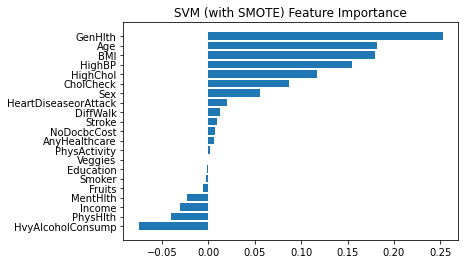

In [103]:
f_importances(search1.best_estimator_.coef_[0], X.columns, 'with')

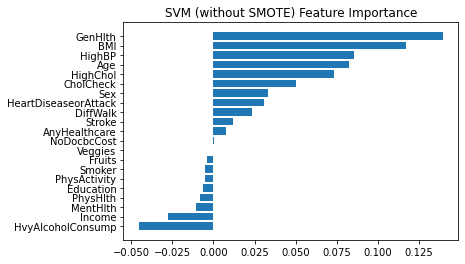

In [104]:
f_importances(search2.best_estimator_.coef_[0], X.columns)

In [76]:
search2.best_estimator_.coef_

array([[ 8.56900511e-02,  7.33097027e-02,  5.04530582e-02,
         1.16798973e-01, -4.86538216e-03,  1.21619654e-02,
         3.04762820e-02, -5.06653040e-03, -3.89823226e-03,
        -2.34768040e-04, -4.53705128e-02,  7.61099317e-03,
         1.17854276e-04,  1.39485671e-01, -1.08271352e-02,
        -8.07025129e-03,  2.34145477e-02,  3.34392625e-02,
         8.23371761e-02, -6.33729189e-03, -2.72638070e-02]])